In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig

Using TensorFlow backend.
../Scripts/plotseqlogo.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
../Scripts/plotseqlogo.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic

/anaconda3/lib/python3.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
# add the absolute path of Data Directory to path_to_data
path_to_data = "/Users/storm/git/Multi-resBind/Data/"
path_to_data_low = path_to_data + "data_RBPslow.h5"
X_test_seq_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_data_low)

In [4]:
concat_low= np.concatenate((X_test_seq_low, X_test_region_low[:, 50:200, :]), axis=2)
print (concat_low.shape)

(7969, 150, 8)


In [5]:
#load models and obtain prediction and integrated_gradients
# add the absolute path of results Directory to path_to_model
path_to_model = "/Users/storm/git/Multi-resBind/results/multi_resBind_vs_DeepRiPe/"
path_to_model_resbind_low= path_to_model + "m_resbind_low_model.h5"

In [6]:
model_resbind_low=load_model(path_to_model_resbind_low, custom_objects={'precision': precision,'recall': recall }) 
pred_resbind_low=model_resbind_low.predict(concat_low)

Instructions for updating:
Colocations handled automatically by placer.


2021-05-11 11:38:35,960 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2021-05-11 11:38:37,045 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [7]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
#number of tasks for each model
num_task_low=len(RBPnames_low)

In [8]:
# code for plot Fig.S4

In [9]:
igres_resbind= integrated_gradients(model_resbind_low)
RBPnames = RBPnames_low
pred= pred_resbind_low
igres = igres_resbind

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


In [10]:
X_test_seq = X_test_seq_low
X_test_region = X_test_region_low
y_test_RBP = y_test_RBP_low
e = concat_low

../Scripts/plotseqlogo.py:153: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([],[])


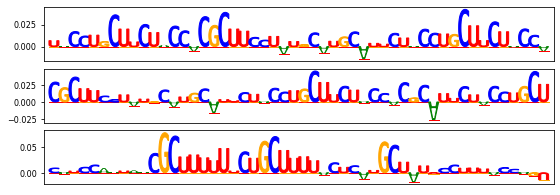

In [11]:
RBPname = "MBNL1"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('MBNL1_contribution_map_zero.eps', format='eps',bbox_inches='tight')

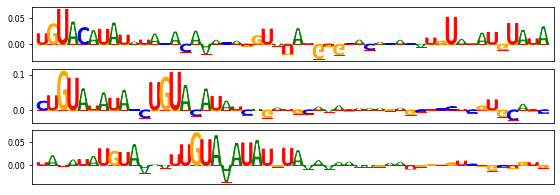

In [12]:
RBPname = "PUM2"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('PUM2_contribution_map_zero.eps', format='eps',bbox_inches='tight')

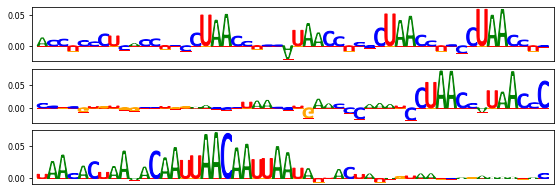

In [13]:
RBPname = "QKI"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('QKI_contribution_map_zero.eps', format='eps',bbox_inches='tight')

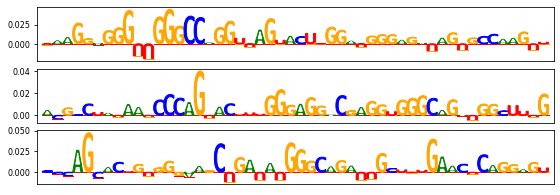

In [14]:
RBPname = "SSB"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('SSB_contribution_map_zero.eps', format='eps',bbox_inches='tight')

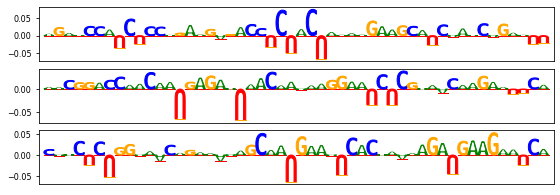

In [15]:
RBPname = "NOP58"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('NOP58_contribution_map_zero.eps', format='eps',bbox_inches='tight')

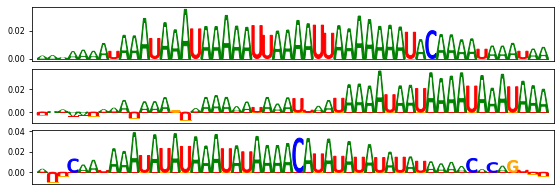

In [16]:
RBPname = "NOP56"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
#plt.savefig('NOP56_contribution_map_zero.eps', format='eps',bbox_inches='tight')